In [37]:
import jsonify
import requests
import pickle
import sys
import os
import re
import sklearn
import joblib
from joblib import load
from flask import Flask, render_template, url_for, flash, redirect, request, send_from_directory
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import h5py
%matplotlib inline
import warnings                       
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from datetime import datetime

In [38]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#os.chdir('gdrive/My Drive/kaggle/SmartGrid')

In [39]:
#df = pd.read_csv("data/Data_for_UCI_named.csv")
#df.head(10)

In [40]:
# from google.colab import files
# uploaded = files.upload()

# for name, data in uploaded.items():
#   with open(name, 'wb') as f:
#     f.write(data)
#     print ('saved file', name)

In [41]:
#import io
#df = pd.read_csv(io.BytesIO(uploaded['Data_for_UCI_named.csv']))

In [42]:
df = pd.read_csv("Data_for_UCI_named.csv")

In [43]:
df.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [45]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403



Total unique labels :  2
unstable    6380
stable      3620
Name: stabf, dtype: int64


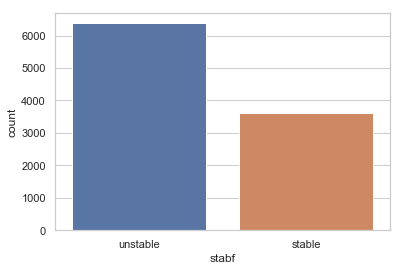

In [46]:
print("\nTotal unique labels : ", df['stabf'].nunique())
print(df['stabf'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='stabf',data=df)

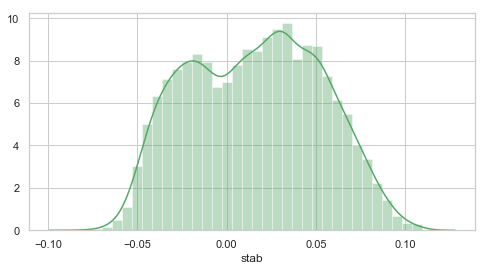

In [47]:
plt.figure(figsize=(8,4))
sns.distplot(df['stab'], color='g')

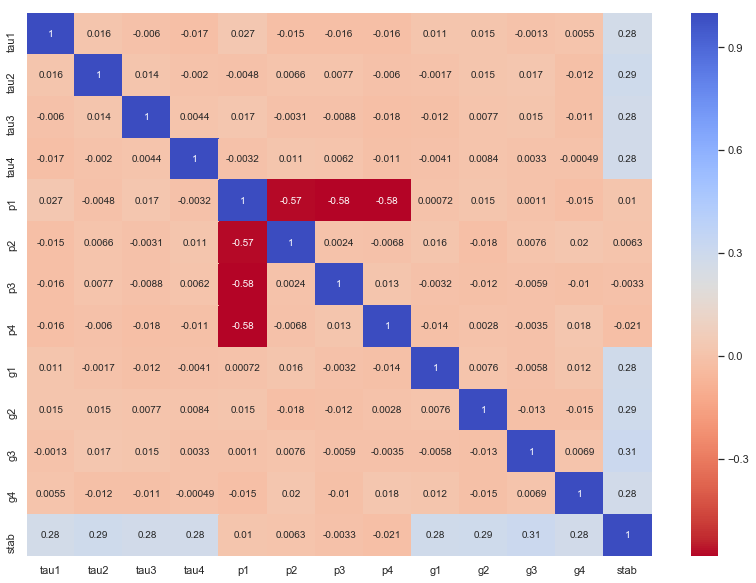

In [48]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm_r')

In [49]:
sns.set()
start_time = datetime.now()

data = df.copy()

map1 = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].replace(map1)


In [50]:
#X = data.drop(['stab', 'stabf'],axis=1)
#Y = data['stab']

In [51]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [52]:

#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)
#X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test,test_size=0.5,random_state=50)

In [53]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]

X_training = X.iloc[:9000, :]
y_training = y.iloc[:9000]

X_testing = X.iloc[9000:, :]
y_testing = y.iloc[9000:]


In [54]:
#X_testing.iloc[:,:]

In [55]:
X_training = X_training.values
y_training = y_training.values

X_testing = X_testing.values
y_testing = y_testing.values

In [56]:
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_testing = scaler.transform(X_testing)

In [57]:
# joblib.dump(scaler, 'Scaler.joblib')

In [58]:
# ANN initialization
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units = 240, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Second hidden layer
model.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))

# Third hidden layer
model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

# Single-node output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [59]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(15, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    model.fit(x_train, y_train, epochs=100, verbose=0)
    model_loss, model_accuracy = model.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {model_loss:.4f} | Accuracy: {model_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

600/600 [==============================] - 0s 729us/step
Round 1 - Loss: 0.1574 | Accuracy: 95.83 %
600/600 [==============================] - 0s 52us/step
Round 2 - Loss: 0.0426 | Accuracy: 99.33 %
600/600 [==============================] - 0s 52us/step
Round 3 - Loss: 0.0006 | Accuracy: 100.00 %
600/600 [==============================] - 0s 53us/step
Round 4 - Loss: 0.0019 | Accuracy: 99.83 %
600/600 [==============================] - 0s 52us/step
Round 5 - Loss: 0.0068 | Accuracy: 99.83 %
600/600 [==============================] - 0s 57us/step
Round 6 - Loss: 0.0001 | Accuracy: 100.00 %
600/600 [==============================] - 0s 52us/step
Round 7 - Loss: 0.0000 | Accuracy: 100.00 %
600/600 [==============================] - 0s 69us/step
Round 8 - Loss: 0.0251 | Accuracy: 99.83 %
600/600 [==============================] - 0s 73us/step
Round 9 - Loss: 0.0010 | Accuracy: 100.00 %
600/600 [==============================] - 0s 60us/step
Round 10 - Loss: 0.0099 | Accu

In [60]:
#X_testing[0].reshape(1,12).shape

In [61]:
y_pred = model.predict(X_testing)
#print(y_pred)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1


In [62]:
# li = list(np.unique(y_pred))
# for i in li:
#     print(round(i,2))
# li = y_pred
# j = 9002
# for i in li:
#     if i[0]>0.8 and i[0]<0.9:
#         print(j,round(i[0],5))
#     j+=1

In [63]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
cm

,Predicted Unstable,Predicted Stable
Actual Unstable,613,11
Actual Stable,18,358


In [64]:
model.save('SG24060121.h5')

In [65]:
# model= load_model('SG2424121.h5')
# scaler=load('Scaler.joblib')

In [66]:

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 240)               3120      
_________________________________________________________________
dense_6 (Dense)              (None, 60)                14460     
_________________________________________________________________
dense_7 (Dense)              (None, 12)                732       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 18,325
Trainable params: 18,325
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
model.get_weights() 

[array([[-0.3029075 ,  0.29372033, -0.6255968 , ..., -0.18400738,
          0.21113266,  0.0498528 ],
        [-0.19961776, -0.5695837 , -0.08442609, ...,  0.41990995,
          0.33071998,  0.17672625],
        [ 0.72717917, -0.09287804,  0.5098562 , ..., -0.47448018,
          0.02268229,  0.29995218],
        ...,
        [ 0.17907448,  0.25615162, -0.04357088, ..., -0.6822436 ,
         -0.5999905 , -0.1938341 ],
        [-0.24000025, -0.18975759,  0.11175582, ..., -0.05196991,
          0.0567074 , -0.18069106],
        [ 0.07311399, -0.11128224, -0.06580514, ..., -0.09419546,
         -0.34702548, -0.26929295]], dtype=float32),
 array([-0.4183096 , -0.4033534 , -0.6952842 ,  0.3123612 ,  0.60943145,
        -0.64476126, -0.5147772 , -0.1942563 , -0.56415033, -0.44712862,
         0.20612432, -0.3279747 ,  0.52729857,  0.38961026, -0.62289226,
         0.14103672, -0.49206537, -0.19532102, -0.47972217, -0.41887102,
        -0.3218541 , -0.16572993, -0.13574705, -0.27680832,  0.062

In [68]:
# k = 9002
# for i,j in y_testing,y_pred:
#     print(i,j)

In [69]:
li = []
j=9002
for i in range(0,1000):
    if y_testing[i]!=y_pred[i]:
        print(y_testing[i],y_pred[i], j+i)
        li.append(i)

1 [0.] 9017
0 [1.] 9053
0 [1.] 9081
1 [0.] 9100
1 [0.] 9141
0 [1.] 9236
1 [0.] 9237
1 [0.] 9247
0 [1.] 9319
1 [0.] 9351
0 [1.] 9408
0 [1.] 9477
0 [1.] 9527
1 [0.] 9533
1 [0.] 9543
1 [0.] 9557
1 [0.] 9590
0 [1.] 9599
0 [1.] 9632
0 [1.] 9652
1 [0.] 9662
1 [0.] 9680
0 [1.] 9715
1 [0.] 9759
1 [0.] 9817
1 [0.] 9833
1 [0.] 9852
1 [0.] 9884
1 [0.] 9907


In [70]:
li

[15,
 51,
 79,
 98,
 139,
 234,
 235,
 245,
 317,
 349,
 406,
 475,
 525,
 531,
 541,
 555,
 588,
 597,
 630,
 650,
 660,
 678,
 713,
 757,
 815,
 831,
 850,
 882,
 905]

In [71]:
def calcres(t1, t2, t3, t4, p1, p2, p3, p4, g1, g2, g3, g4):
    X_test = scaler.transform([[t1, t2, t3, t4, p1, p2, p3, p4, g1, g2, g3, g4]])
    #print(X_test,X_test.shape)
    for i in li:
        prediction = model.predict(X_testing[i].reshape(1,12))
        print(prediction, i+2)
        if prediction[0][0]<=0.5:
            print( "Oops! the system is linearly unstable.")
        else:
            print( "Great! the system is stable." )

In [72]:
print(calcres(2.837221501,8.244192067,0.724832379,9.398787417,2.686927371,-0.836726338,-0.956175486,-0.894025548,0.799332056,0.095360039,0.251985331,0.153553754))
#print(calcres(8.472177282,2.045812588,2.550468814,9.855937949,3.635816965,-0.990384574,-0.782448796,-1.862983596,0.758596065,0.294628154,0.216889989,0.48657837))

[[1.4442438e-08]] 17
Oops! the system is linearly unstable.
[[1.]] 53
Great! the system is stable.
[[0.9975745]] 81
Great! the system is stable.
[[0.12566955]] 100
Oops! the system is linearly unstable.
[[1.5081232e-06]] 141
Oops! the system is linearly unstable.
[[0.9975758]] 236
Great! the system is stable.
[[1.5587331e-05]] 237
Oops! the system is linearly unstable.
[[0.00554114]] 247
Oops! the system is linearly unstable.
[[0.99809605]] 319
Great! the system is stable.
[[1.8296161e-09]] 351
Oops! the system is linearly unstable.
[[0.9999981]] 408
Great! the system is stable.
[[0.99996126]] 477
Great! the system is stable.
[[0.9988702]] 527
Great! the system is stable.
[[0.19321398]] 533
Oops! the system is linearly unstable.
[[6.380837e-09]] 543
Oops! the system is linearly unstable.
[[1.4194548e-08]] 557
Oops! the system is linearly unstable.
[[6.8945956e-20]] 590
Oops! the system is linearly unstable.
[[0.9999999]] 599
Great! the system is stable.
[[0.9981183]] 632
Great! the sys